# **Adult Income Census**

## <b>1. Dataset Description</b>
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
### Aim
The prediction task is to determine whether a person makes over $50K a year.


### Input Variables

1. Age: Describes the age of individuals. Continuous.
2. Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: Continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: Number of years spent in education. Continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: Continuous.
12. capital-loss: Continuous.
13. hours-per-week: Continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. income: >50K,<=50K



## <b>2. Exploratory Data Analysis</b>

### 2.1 Importing Libraries and Dataset

##### Importing Required Libraries

In [43]:
# Generic Data handling Libraries
import pandas as pd
import numpy as np

# Graph plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Sklearn Libraries for model building
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##### Loading the Dataset

In [44]:
df_original = pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education_years','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])

### 2.2 Dataset Description

In [45]:
df_original

,age,workclass,fnlwgt,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
df_original.describe(include='all')

,age,workclass,fnlwgt,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


##### Number of Records and attributes in Dataset

In [47]:
print("Total number of records:",df_original.shape[0])
print("Total number of attributes:",df_original.shape[1])

Total number of records: 32561
Total number of attributes: 15


##### Data Types

In [48]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_years  32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Attribute Names

In [49]:
df_original.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

##### Correlation Matrix of numerical attributes

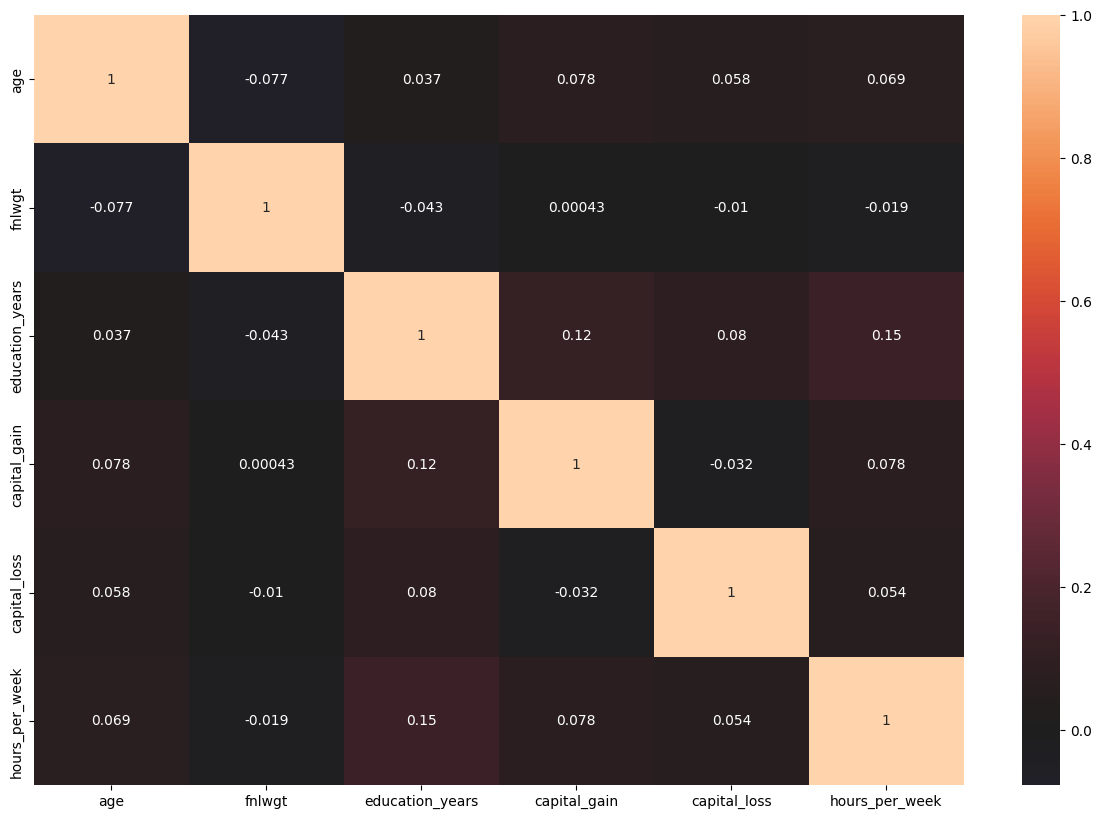

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df_original.corr(numeric_only=True),annot=True,center = 0)
plt.show()

##### Number of Records (Age wise)

In [51]:
fig = px.bar(df_original.groupby('age')['age'].count().reset_index(name='count'), 
             x='age', 
             y='count', 
             title='Number of Records (Age Wise)', 
             labels={'age': 'Age', 'count': 'Number of Records'},
             color='age',
             color_continuous_scale="Viridis")
fig.show()

Conclusion:
<ul> Most of the records of individuals in dataset have age between 20 and 50.</ul>

##### Number of Records (Native Country Wise)

In [52]:
#Plotting Graph of Number of Records grouped by Native Country
temp = df_original['native_country'].groupby(df_original['native_country']).count().reset_index(name='count')
temp = temp.sort_values('count')
fig = px.bar(temp, 
             y='native_country', 
             x='count', 
             title='Number of Records (Native Country Wise)', 
             labels={'native_country': 'Country', 'count': 'Number of Records'})
fig.update_layout(height=900)
fig.show()

#Plotting Graph of Native Country US vs NON-US
temp=pd.DataFrame()
temp['native_country'] = df_original['native_country'].copy()
temp['native_country'] = np.where(temp['native_country']==" United-States","US","NON-US")
temp = temp.groupby('native_country').size().reset_index(name = 'count')
fig = px.pie(temp, 
             names='native_country', 
             values='count',
             title='Number of Records (Native Country Wise)',
             labels={'native_country': 'Country', 
                     'count': 'Number of Records'})
fig.show()


Conclusion:
<ul> Majority of indiduals in dataset have "United States" as their native country .</ul>

##### Explore Education Years vs Income

In [53]:
# Calculating Probability of income >50K while grouped by Years of Education 
temp = df_original.groupby('education_years')['income'].value_counts().sort_index()
l = [0]
for i in range(2,17):
        l.append(round((temp[i][1])/(temp[i][1]+temp[i][0]),2))

# Plotting Graph 
temp = {}
temp['years'] = np.arange(np.min(df_original.education_years),np.max(df_original.education_years)+1)
temp['probability']= l
fig = px.bar(pd.DataFrame(temp),
             x='years',
             y='probability',
             color='years',
             color_continuous_scale="ylgnbu",
             title='Education Years vs Income',
             labels={'years':'Years of Education','probability':'Ratio of records with income >50K'})
fig.show()

Conclusion:
<ul> There is a direct relationship between "Individuals earning >50K" and "Number of years of education".</ul>

##### Workclasses vs Income

In [54]:
incomeWorkclass = pd.DataFrame(df_original.groupby('workclass').income.value_counts())
incomeWorkclass = incomeWorkclass.unstack()
incomeWorkclass = incomeWorkclass.drop([' ?'])
incomeWorkclass = incomeWorkclass.fillna(0)
incomeWorkclass['Ratio'] = round(incomeWorkclass['count',' >50K'] / (incomeWorkclass['count',' >50K']+incomeWorkclass['count',' <=50K']),2)
incomeWorkclass['Workclass'] = incomeWorkclass.index
incomeWorkclass = incomeWorkclass.droplevel('income',axis=1)
incomeWorkclass = incomeWorkclass.sort_values('Ratio')

fig = px.bar(pd.DataFrame(incomeWorkclass),
             x='Workclass',
             y='Ratio',
             color='Ratio',
             color_continuous_scale="greens",
             title='Workclass vs Income')
fig.show()



Conclusion:
<ul> Individuals who are self-employed with incorporated businesses have the highest proportion of people earning >$50K.</ul>

##### Race vs Income

In [55]:

incomeRace = pd.DataFrame(df_original.groupby('race').income.value_counts())
incomeRace = incomeRace.unstack()
incomeRace['Ratio'] = round(incomeRace['count',' >50K'] / (incomeRace['count',' >50K']+incomeRace['count',' <=50K']),2)
incomeRace['Race'] = incomeRace.index
incomeRace = incomeRace.droplevel('income',axis=1)
incomeRace = incomeRace.sort_values('Ratio')

fig = px.bar(pd.DataFrame(incomeRace),
             x='Race',
             y='Ratio',
             color='Ratio',
             color_continuous_scale="cividis",
             title='Race vs Income')
fig.show()

Conclusion:
<ul> "Whites" and "Asian-Pacific Islanders" in the dataset have almost double the likelihood of earning >$50K than any other race.</ul>

##### Number of working hours vs Income

In [56]:

incomeHours = pd.DataFrame(df_original.groupby('hours_per_week').income.value_counts())
incomeHours = incomeHours.unstack()
incomeHours['Ratio'] = round(incomeHours['count',' >50K'] / (incomeHours['count',' >50K']+incomeHours['count',' <=50K']),2)
incomeHours['Working hours per week'] = incomeHours.index
incomeHours = incomeHours.droplevel('income',axis=1)
fig = px.scatter(pd.DataFrame(incomeHours),
             x='Working hours per week',
             y='Ratio',
             color='Ratio',
             trendline='lowess',
             color_continuous_scale="magma",
             title='Working Hours vs Income')
fig.show()


Conclusion:
<ul> As "working hours per week" increase, "income" rises gradually and plateaus at around 65 hours.</ul>

##### Sex vs Income

In [57]:
incomeGender = df_original.groupby('sex').income.value_counts()
Female = incomeGender[1]/incomeGender[0]
Male = incomeGender[3]/incomeGender[2]
temp = {}
temp['probability'] = Male,Female
temp['sex'] = ['Male','Female']

genderGraph = pd.DataFrame(temp)

fig = px.bar(genderGraph,
             x = 'sex',
             y = 'probability',
             color='sex',
             labels={'probability':'Ratio of records with income >50K','sex':'Sex'})
fig.show()


Conclusion:
<ul> Males in the dataset have a significantly higher proportion earning >50K than Females.</ul>

In [58]:
incomeRelation = pd.DataFrame(df_original.groupby('relationship').income.value_counts())
incomeRelation = incomeRelation.unstack()
incomeRelation['Ratio'] = round(incomeRelation['count',' >50K'] / (incomeRelation['count',' >50K']+incomeRelation['count',' <=50K']),2)
incomeRelation['Relationship'] = incomeRelation.index
incomeRelation = incomeRelation.droplevel('income',axis=1)
incomeRelation = incomeRelation.sort_values('Ratio')
fig = px.bar(pd.DataFrame(incomeRelation),
             x='Relationship',
             y='Ratio',
             color='Ratio',
             color_continuous_scale="viridis",
             title='Relationship vs Income')
fig.show()

Conclusion:
<ul>Married individuals have a significantly higher ratio of individuals earning >50K</ul>

## <b>3. Data Pre-Processing</b>

##### Copy original dataset

In [59]:
df=df_original.copy()

##### Null Values

In [60]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [61]:
print(df[df==' ?'].count())
df[df==' ?']=np.nan

# Replace workclass and native_country with mode of respective columns
for col in ['workclass', 'native_country','occupation']: 
    df[col].fillna(df[col].mode()[0], inplace=True)


age                   0
workclass          1836
fnlwgt                0
education             0
education_years       0
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64


##### Duplicate Records

In [62]:
print("Number of Duplicate Records found:",df[df.duplicated()].shape[0])
df = df.drop_duplicates().reset_index(drop=True)

Number of Duplicate Records found: 24


##### Determining Outliers in Dataset

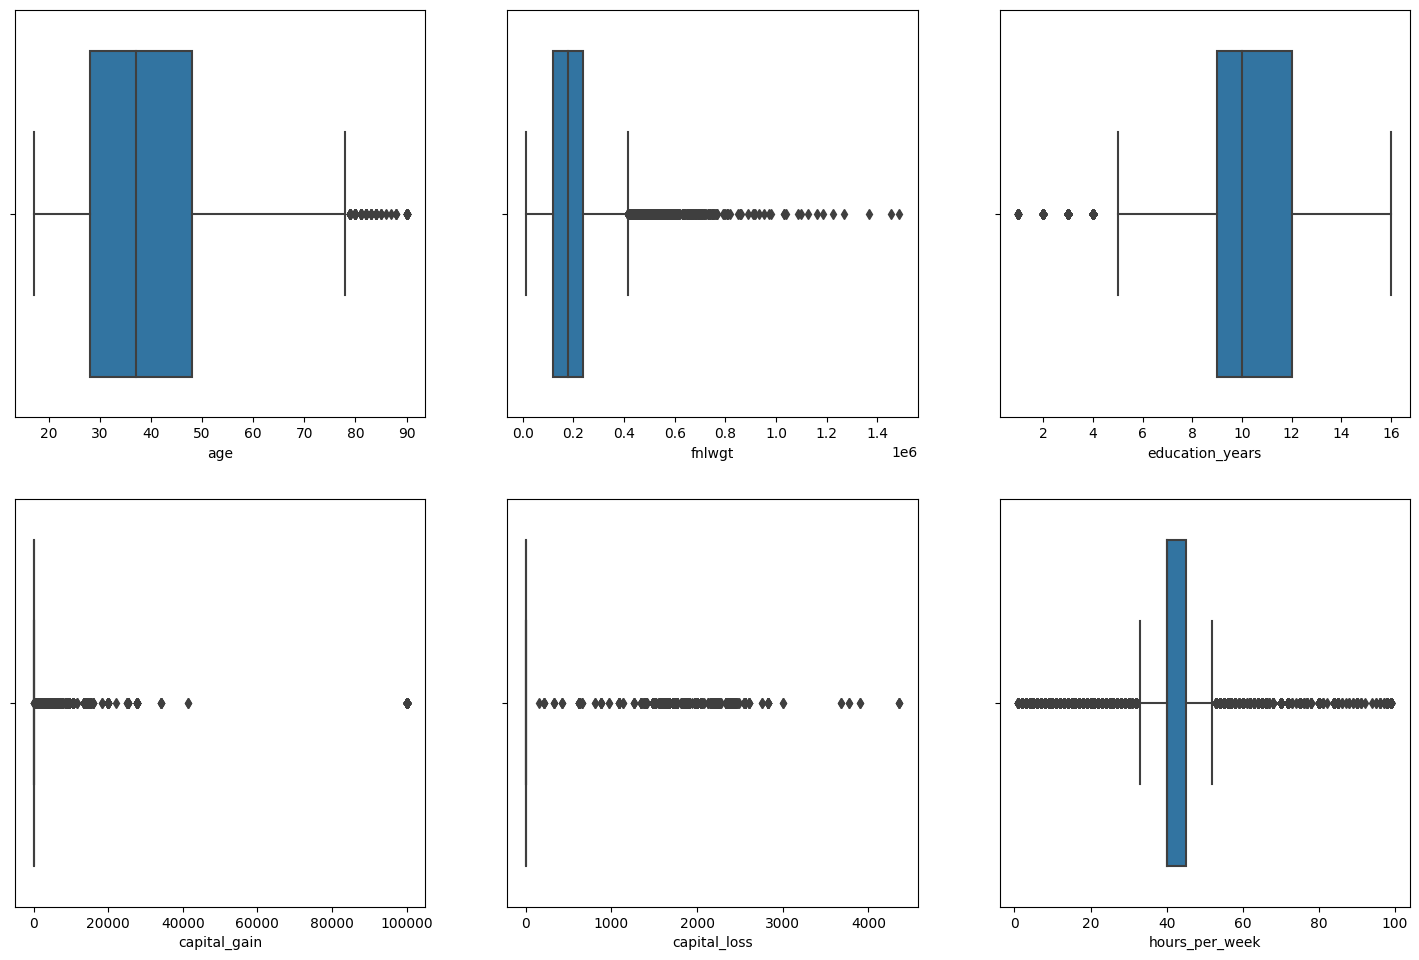

In [63]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax)

##### Converting target attribute to bool

In [64]:
# Converting <=50K to 0 and >50K to 1
df['income'] = np.where(df['income']==" <=50K",0,1)
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32532    0
32533    1
32534    0
32535    0
32536    1
Name: income, Length: 32537, dtype: int32

##### Correlation matrix including each category

In [65]:
dfplot = df.copy()
dfplot['native_country'] = np.where(dfplot['native_country']==" United-States","US","NON-US")
dfplot = pd.get_dummies(dfplot)
fig = px.imshow(dfplot.corr(),color_continuous_scale='BrBG')
fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    height = 1100
)
fig.show()

##### Converting Categorical attributes to Numerical

In [66]:
df['native_country'] = np.where(df['native_country']==" United-States","US","NON-US")

#Label Encoding
features_to_encode = ["workclass","education"]
le = LabelEncoder()
for feature in features_to_encode:
    le = LabelEncoder()
    encoded_feature = le.fit_transform(df[feature])
    df[feature] = encoded_feature

# One-Hot Encoding
df = pd.get_dummies(df)

##### Feature Scaling

In [67]:
X = df.drop('income',axis=1)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
Y=df.income
X=X_Scaled


## **4. Model Building using Different classifiers**

##### Logistic Regression Model

In [68]:
LRModel = LogisticRegression()
def logisticReg(x_train,x_test,y_train,y_test):
    LRModel.fit(x_train,y_train)
    y_pred = LRModel.predict(x_test)
    return confusion_matrix(y_test,y_pred)


##### K- Nearest  Neighbour Classifier

In [69]:
knn = KNeighborsClassifier(n_neighbors = 5)
def KNearestNeighbours(x_train,x_test,y_train,y_test):
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    return confusion_matrix(y_test,y_pred)

##### Decision Tree Classifier

In [70]:

decision_tree = DecisionTreeClassifier()
def decisionTree(x_train,x_test,y_train,y_test):
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    return confusion_matrix(y_test,y_pred)

##### Gaussian Naive Bayes Classifier

In [71]:
gb = GaussianNB()
def naiveBayes(x_train,x_test,y_train,y_test):
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    return confusion_matrix(y_test,y_pred)

##### K-Fold Cross Validation

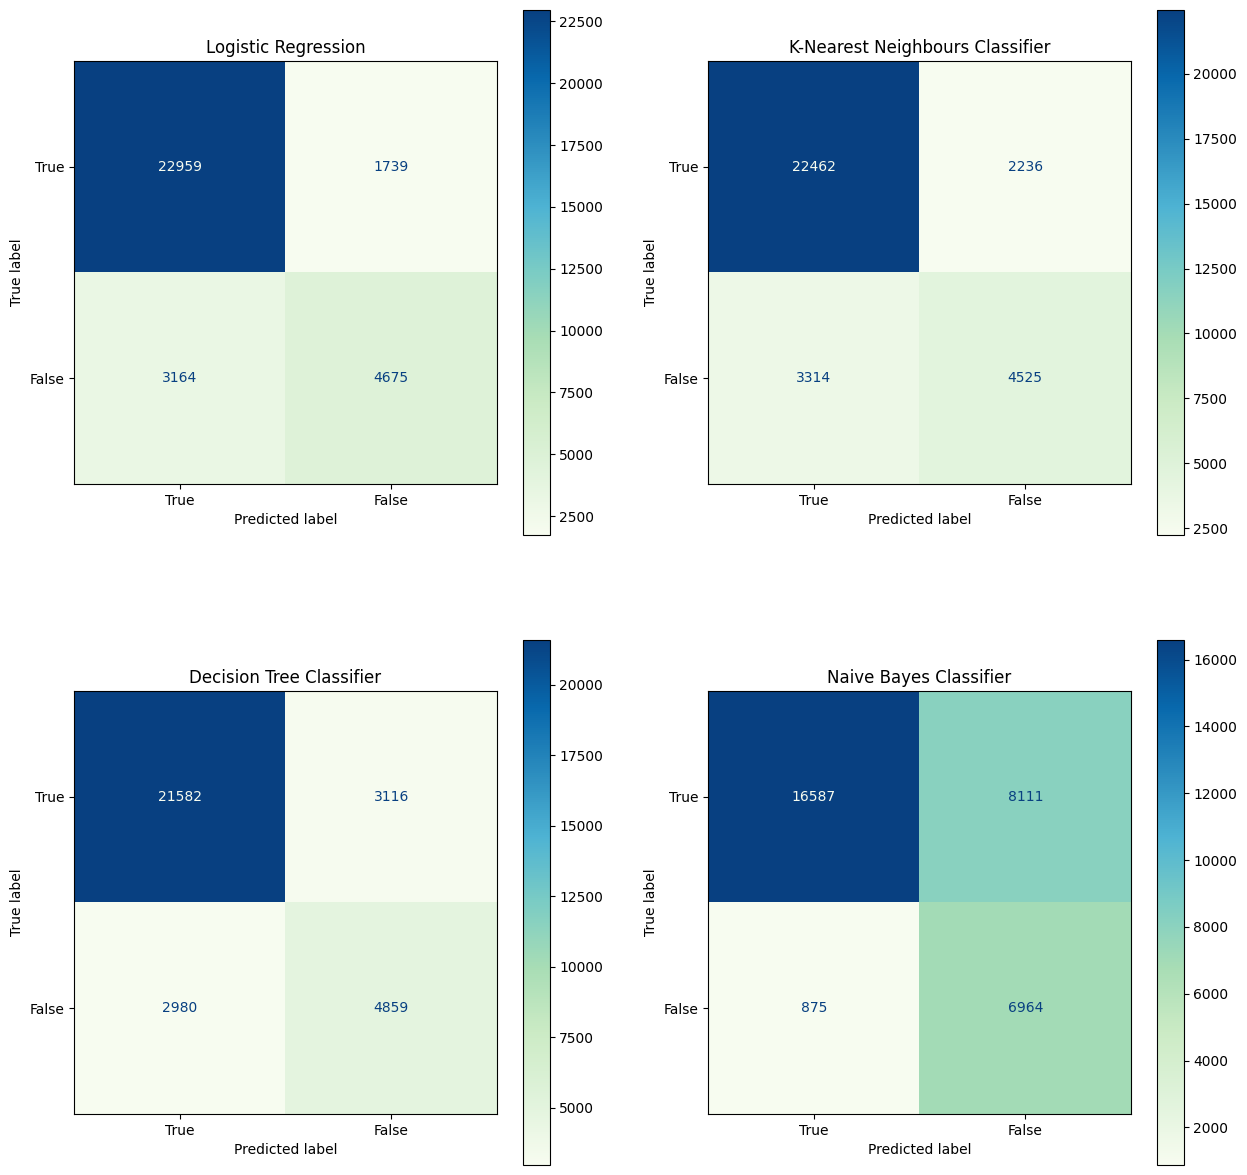

In [72]:
LRConfusionMatrix = 0
KNNConfusionMatrix = 0
DTConfusionMatrix = 0
NBConfusionMatrix = 0
f = KFold(n_splits = 5)
for train_index,test_index in f.split(X):

    x_train=X[train_index]
    x_test=X[test_index]
    y_train=Y.iloc[train_index]
    y_test=Y.iloc[test_index]

    # Logistic Regression
    temp = logisticReg(x_train,x_test,y_train,y_test)
    LRConfusionMatrix = LRConfusionMatrix + temp
    
    # K-Nearest Neighbours
    temp = KNearestNeighbours(x_train,x_test,y_train,y_test)
    KNNConfusionMatrix = KNNConfusionMatrix + temp
    
    # Decision Tree Classifier
    temp = decisionTree(x_train,x_test,y_train,y_test)
    DTConfusionMatrix = DTConfusionMatrix + temp
    
    # Gaussian Naive Bayes Classifier
    temp = naiveBayes(x_train,x_test,y_train,y_test)
    NBConfusionMatrix = NBConfusionMatrix + temp
    
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))
ConfusionMatrixDisplay(LRConfusionMatrix,display_labels = [True,False]).plot(ax = ax1,cmap='GnBu')
ax1.title.set_text("Logistic Regression")
ConfusionMatrixDisplay(KNNConfusionMatrix,display_labels = [True,False]).plot(ax = ax2,cmap='GnBu')
ax2.title.set_text("K-Nearest Neighbours Classifier")
ConfusionMatrixDisplay(DTConfusionMatrix,display_labels = [True,False]).plot(ax = ax3 , cmap='GnBu')
ax3.title.set_text("Decision Tree Classifier")
ConfusionMatrixDisplay(NBConfusionMatrix,display_labels = [True,False]).plot(ax = ax4 , cmap='GnBu')
ax4.title.set_text("Naive Bayes Classifier")
plt.show()



## **5. Performance of Different Models**

##### Calculation of different parameters for each model

In [73]:
# Calcualtion of different parameters for each classifier
def calculate_scores(confusionMatrix):
    TP = confusionMatrix[0][0]
    FP = confusionMatrix[0][1]
    FN = confusionMatrix[1][0]
    TN = confusionMatrix[1][1]
    precision = round(TP/(TP+FN),3)
    recall = round(TP/(TP+FP),3)
    f1 = round((2*precision*recall) / (precision + recall),3)
    accuracy = round((TP+TN) / (TP + FP + TN + FN),3)
    return precision,recall,f1,accuracy

LRpr,LRre,LRf1,LRac = calculate_scores(LRConfusionMatrix)
KNNpr,KNNre,KNNf1,KNNac = calculate_scores(KNNConfusionMatrix)
DTpr,DTre,DTf1,DTac= calculate_scores(DTConfusionMatrix)
NBpr,NBre,NBf1,NBac = calculate_scores(NBConfusionMatrix)

# Plotting the graph of all the calculated metrics
data = {
    'Classifier' : ['Logistic Regression','K-Nearest Neighbours','Decision Tree','Naive Bayes'],
    'Precision' : [LRpr,KNNpr,DTpr,NBpr],
    'Recall' : [LRre,KNNre,DTre,NBre],
    'F1-Score' : [LRf1,KNNf1,DTf1,NBf1],
    'Accuracy' : [LRac,KNNac,DTac,NBac]
}
plotdata = pd.DataFrame(data)
fig = px.bar(plotdata.melt(id_vars='Classifier',var_name='Parameter',value_name='Value'), 
             x='Value', y = 'Classifier', 
             color='Parameter',
             barmode='group',
             text='Value',
             labels='Parameter')


fig.update_layout(title='Model Parameters Graph',yaxis_title='Classifiers',hoverlabel=dict(bgcolor='mistyrose', font_size=15),height=600)
fig.show()